A notebook to test `pycairo` (canvas library)

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

import cairo
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sympy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# font options
font = {
    #'family' : 'normal',
    #'weight' : 'bold',
    'size'   : 18
}

plt.rc('font', **font)
plt.rc('lines', linewidth=2)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


Create an arbitrary `cairo` image.

In [98]:
WIDTH, HEIGHT = 256, 150

surface = cairo.ImageSurface (cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
x, y, radius = (200, 250, 200)
ctx = cairo.Context(surface)
ctx.set_line_width(15)
ctx.arc(x, y, radius, 0, 2.0 * math.pi)
ctx.set_source_rgb(0.8, 0.0, 0.0)
ctx.fill_preserve()
ctx.set_source_rgb(0.0, 0, 0.7)
ctx.stroke()
buf = surface.get_data()

Convert it into a numpy array.

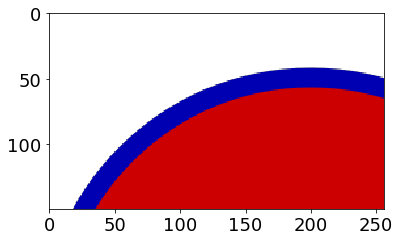

In [99]:
im = np.frombuffer(buf, dtype=np.uint8)
# im.shape = (HEIGHT, WIDTH, 4)
im = np.reshape(im, [HEIGHT, WIDTH, 4])
# swap axis to get r-g-b-alpha
im = im[:, :, [2, 1, 0, 3]]
plt.imshow(im)

## Cairo

In [58]:
# tutorial (original cairo in C code). https://www.cairographics.org/tutorial/

def surface_to_nparray(surface):
    buf = surface.get_data()
    im = np.frombuffer(buf, dtype=np.uint8)
    h = surface.get_height()
    w = surface.get_width()
    im = np.reshape(im, [h, w, 4])
    # swap axis to get r-g-b-alpha
    im = im[:, :, [2, 1, 0, 3]]
    return im

def show_surface(surface):
    im = surface_to_nparray(surface)
    plt.imshow(im)
    plt.axis('equal')

### A rectangle with solid colour.

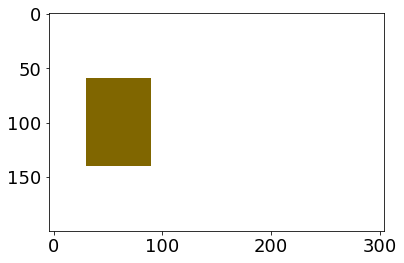

In [63]:
width, height = 300, 200
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, width, height)
ctx = cairo.Context(surface)
ctx.scale(width, height)

# solid color
ctx.set_source_rgb(0.5, 0.4, 0.0)
ctx.rectangle(0.1, 0.3, 0.2, 0.4) # Rectangle (x0, y0, width, height)
ctx.fill_preserve()
# ctx.stroke()
show_surface(surface)

## A simple stroke, and a rectangle

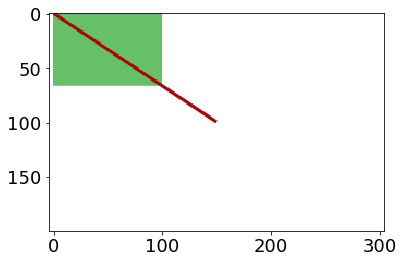

In [93]:
width, height = 300, 200
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, width, height)
ctx = cairo.Context(surface)

# rectangle
ctx.rectangle(0, 0, width/3.0, height/3.0)
ctx.set_source_rgba(0, 1.0, 0, 0.6)
ctx.fill()

# line
ctx.set_source_rgb(0.7, 0.0, 0.0)
ctx.move_to(0, 0)
ctx.line_to(width/2.0, height/2.0)
ctx.set_line_width(3)
ctx.stroke()

show_surface(surface)